In [8]:
# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
papers = pd.read_csv(r'C:\Users\67307\Documents\CSCI 5523\OLAprilMay19.csv')
# Print head
papers.head(1000)

,Unnamed: 0,Like count,Retweet count,Source,User location,date,tweet,tweet_id
0,0.0,1.0,0.0,Twitter for iPhone,Danville IL,2019-04-30 23:57:00,#kbbmethod #tonyrobbins I wanna have that tic...,1.1233757336263639e+18
1,1.0,3.0,0.0,Buffer,"Indianapolis, IN",2019-04-30 23:31:02,5 Ways to Improve Online Course Completion Rat...,1.1233691956668457e+18
2,2.0,0.0,0.0,Sprout Social,"Philadelphia, PA",2019-04-30 18:17:03,@UPennELP designed and delivered an eight-modu...,1.123290179026944e+18
3,3.0,1.0,0.0,Twitter for iPhone,"Boston, MA",2019-04-30 21:53:45,"Thanks for the 💛,NECHE! “the Commission commen...",1.1233447158422446e+18
4,4.0,3.0,0.0,Instagram,Worldwide,2019-04-30 17:51:49,Another training session at @PirateStudiosUK \...,1.1232838292281754e+18
...,...,...,...,...,...,...,...,...
995,26.0,5.0,5.0,Squarespace,NaN,2019-04-24 16:00:18,Research from @institute4tl's @eleblanc1224 an...,1.1210814411217019e+18
996,27.0,1.0,0.0,SEMrush Social Media Tool,On the Cloud,2019-04-24 16:30:02,With the ever-changing technology landscape an...,1.12108892298829e+18
997,28.0,2.0,0.0,Buffer,"North Carolina, USA",2019-04-24 16:01:20,2019 Best Online Community Colleges in North C...,1.1210816988700058e+18
998,29.0,10.0,3.0,Twitter for iPhone,Limerick,2019-04-24 15:42:02,"Fascinating findings for #onlinelearning, #inf...",1.1210768418030223e+18


In [11]:
df = papers.drop(columns=['Unnamed: 0', 'Source', 'date', 'tweet_id'], axis=1)
df.head()

,Like count,Retweet count,User location,tweet
0,1.0,0.0,Danville IL,#kbbmethod #tonyrobbins I wanna have that tic...
1,3.0,0.0,"Indianapolis, IN",5 Ways to Improve Online Course Completion Rat...
2,0.0,0.0,"Philadelphia, PA",@UPennELP designed and delivered an eight-modu...
3,1.0,0.0,"Boston, MA","Thanks for the 💛,NECHE! “the Commission commen..."
4,3.0,0.0,Worldwide,Another training session at @PirateStudiosUK \...


In [12]:
dff = df.dropna()

In [13]:
from afinn import Afinn
af = Afinn()
# af.score('bad')
sentiment_scores = [af.score(tweet) for tweet in dff['tweet']]
# sentiment_scores = [af.score(tweet) for tweet in filtered_sentence]


sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

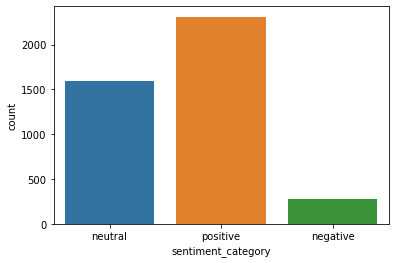

In [14]:
df1 = pd.DataFrame([sentiment_scores, sentiment_category]).T
df1.columns = [ 'sentiment_score', 'sentiment_category']
df1['sentiment_score'] = df1.sentiment_score.astype('float')
# df1.groupby(by=['news_category']).describe()
import seaborn as sns
sns.countplot(x='sentiment_category',data=df1)

In [15]:
import collections
ctr = collections.Counter(sentiment_category)
print("Frequency of the elements in the List : ",ctr)

Frequency of the elements in the List :  Counter({'positive': 2310, 'neutral': 1597, 'negative': 278})
